In [ ]:
# Importing libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## **Black-Scholes Assumptions**

The Black-Scholes model makes certain assumptions:
*   No dividends are paid out during the life of the option.
*   Markets are random because market movements can't be predicted.
*   There are no transaction costs in buying the option.
*   The risk-free rate and volatility of the underlying asset are known and constant.
*   The returns of the underlying asset are normally distributed.
*   The option is European and can only be exercised at expiration.

C = S * N(d_1) - K * e^{-rt} * N(d_2)

where:
C =
S =




In [ ]:
S = 40  # Underlying Price of the Asset
K = 50  # Strike Price
T = 2   # Time to Expiration (Maturity)
r = 0.1 # Risk-Free Rate
vol = 0.1 # Volatility (σ,standard deviation)

In [ ]:
#Calculating d1
d1 = (math.log(S/K) + (r + 0.5 * vol**2)*T ) / (vol * math.sqrt(T))

In [ ]:
#Calculating d2
d2 = d1 - (vol * math.sqrt(T))

In [ ]:
#Calculating Call Option
C = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)

In [ ]:
#Calculating Put Option
P = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

In [ ]:
print('The value of d1 is: ', round(d1, 4))
print('The value of d2 is: ', round(d2, 4))
print('The price of the call option is: $', round(C, 2))
print('The price of the put option is: $', round(P, 2))

The value of d1 is:  -0.0929
The value of d2 is:  -0.2344
The price of the call option is: $ 1.84
The price of the put option is: $ 2.78


## **Calculating Greeks**

Delta (Call): 0.46297603393616205
Delta (Put): -0.537023966063838


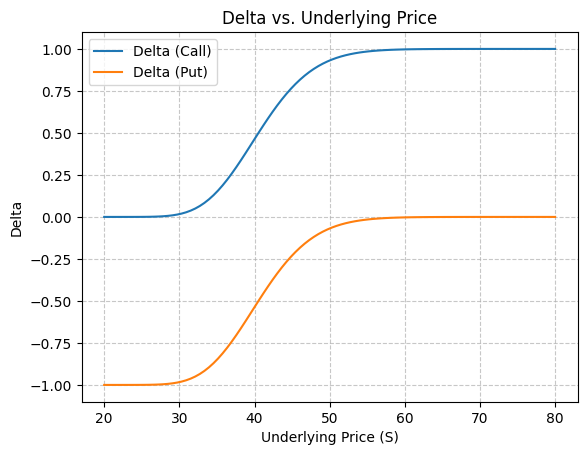

In [ ]:
# Calculate Delta for call and put
delta_call = norm.cdf(d1)
delta_put = norm.cdf(d1) - 1

# Print Delta values
print(f"Delta (Call): {delta_call}")
print(f"Delta (Put): {delta_put}")

# Visualization of Delta
S_range = np.linspace(20, 80, 100)  # Range of underlying prices
delta_call_values = [norm.cdf((math.log(s / K) + (r + 0.5 * vol ** 2) * T) / (vol * math.sqrt(T))) for s in S_range]
delta_put_values = [norm.cdf((math.log(s / K) + (r + 0.5 * vol ** 2) * T) / (vol * math.sqrt(T))) - 1 for s in S_range]

plt.plot(S_range, delta_call_values, label="Delta (Call)")
plt.plot(S_range, delta_put_values, label="Delta (Put)")
plt.xlabel("Underlying Price (S)")
plt.ylabel("Delta")
plt.title("Delta vs. Underlying Price")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Gamma: 0.07021977530398422


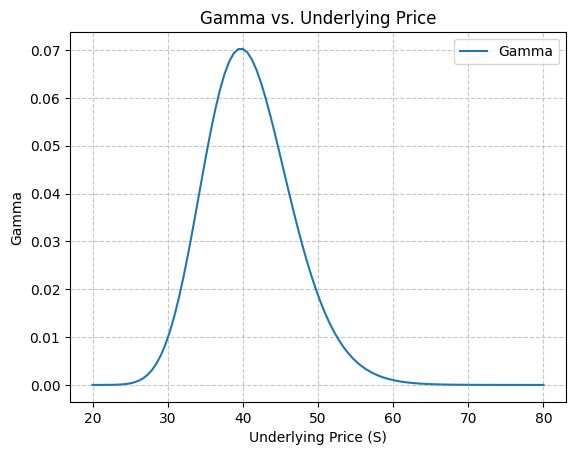

In [ ]:
# Calculate Gamma
gamma = norm.pdf(d1) / (S * vol * math.sqrt(T))

# Print Gamma value
print(f"Gamma: {gamma}")

# Visualization of Gamma
gamma_values = [norm.pdf((math.log(s / K) + (r + 0.5 * vol ** 2) * T) / (vol * math.sqrt(T))) / (s * vol * math.sqrt(T)) for s in S_range]

plt.plot(S_range, gamma_values, label="Gamma")
plt.xlabel("Underlying Price (S)")
plt.ylabel("Gamma")
plt.title("Gamma vs. Underlying Price")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


Theta (Call): -2.2293188655542986
Theta (Put): 1.864334899835611


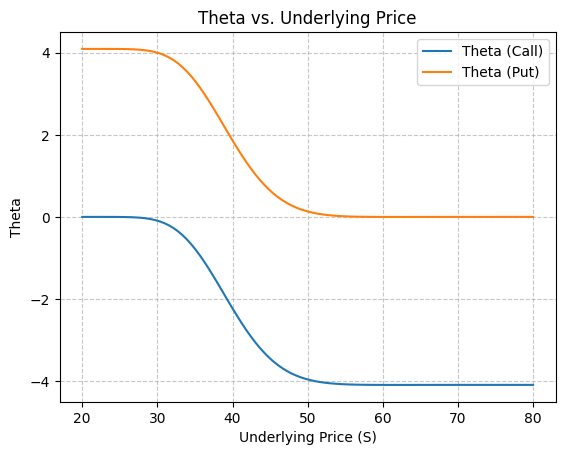

In [ ]:
# Calculate Theta for call and put
theta_call = (-S * norm.pdf(d1) * vol / (2 * math.sqrt(T)) - r * K * math.exp(-r * T) * norm.cdf(d1 - vol * math.sqrt(T)))
theta_put = (-S * norm.pdf(d1) * vol / (2 * math.sqrt(T)) + r * K * math.exp(-r * T) * norm.cdf(-d1 + vol * math.sqrt(T)))

# Print Theta values
print(f"Theta (Call): {theta_call}")
print(f"Theta (Put): {theta_put}")

# Visualization of Theta
theta_call_values = [(-s * norm.pdf((math.log(s / K) + (r + 0.5 * vol ** 2) * T) / (vol * math.sqrt(T))) * vol / (2 * math.sqrt(T))
                     - r * K * math.exp(-r * T) * norm.cdf((math.log(s / K) + (r + 0.5 * vol ** 2) * T) / (vol * math.sqrt(T)) - vol * math.sqrt(T)))
                    for s in S_range]
theta_put_values = [(-s * norm.pdf((math.log(s / K) + (r + 0.5 * vol ** 2) * T) / (vol * math.sqrt(T))) * vol / (2 * math.sqrt(T))
                    + r * K * math.exp(-r * T) * norm.cdf(-(math.log(s / K) + (r + 0.5 * vol ** 2) * T) / (vol * math.sqrt(T)) + vol * math.sqrt(T)))
                    for s in S_range]

plt.plot(S_range, theta_call_values, label="Theta (Call)")
plt.plot(S_range, theta_put_values, label="Theta (Put)")
plt.xlabel("Underlying Price (S)")
plt.ylabel("Theta")
plt.title("Theta vs. Underlying Price")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


Vega: 22.470328097274955


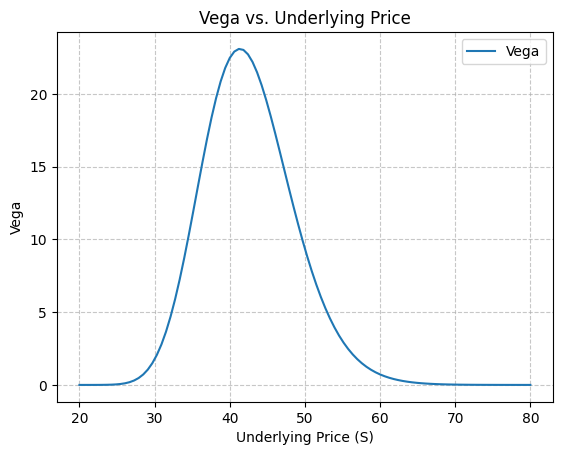

In [ ]:
# Calculate Vega
vega = S * norm.pdf(d1) * math.sqrt(T)

# Print Vega value
print(f"Vega: {vega}")

# Visualization of Vega
vega_values = [s * norm.pdf((math.log(s / K) + (r + 0.5 * vol ** 2) * T) / (vol * math.sqrt(T))) * math.sqrt(T) for s in S_range]

plt.plot(S_range, vega_values, label="Vega")
plt.xlabel("Underlying Price (S)")
plt.ylabel("Vega")
plt.title("Vega vs. Underlying Price")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


Rho (Call): 33.351213262448496
Rho (Put): -48.5218620453497


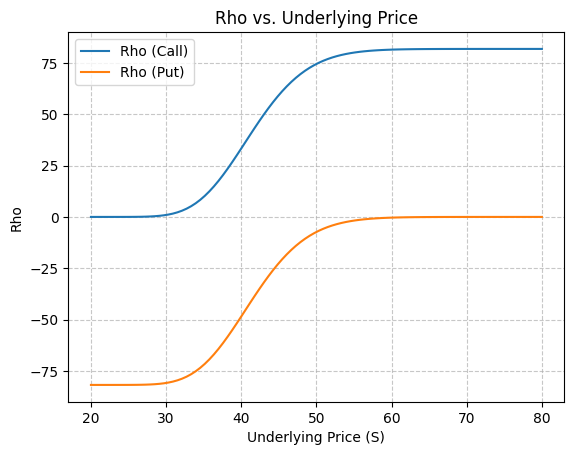

In [ ]:
# Calculate Rho for call and put
rho_call = K * T * math.exp(-r * T) * norm.cdf(d2)
rho_put = -K * T * math.exp(-r * T) * norm.cdf(-d2)

# Print Rho values
print(f"Rho (Call): {rho_call}")
print(f"Rho (Put): {rho_put}")

# Visualization of Rho
rho_call_values = [K * T * math.exp(-r * T) * norm.cdf((math.log(s / K) + (r + 0.5 * vol ** 2) * T) / (vol * math.sqrt(T)) - vol * math.sqrt(T)) for s in S_range]
rho_put_values = [-K * T * math.exp(-r * T) * norm.cdf(-(math.log(s / K) + (r + 0.5 * vol ** 2) * T) / (vol * math.sqrt(T)) + vol * math.sqrt(T)) for s in S_range]

plt.plot(S_range, rho_call_values, label="Rho (Call)")
plt.plot(S_range, rho_put_values, label="Rho (Put)")
plt.xlabel("Underlying Price (S)")
plt.ylabel("Rho")
plt.title("Rho vs. Underlying Price")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()
